In [0]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs, make_circles

Text(0.5, 1.0, 'Two blobs')

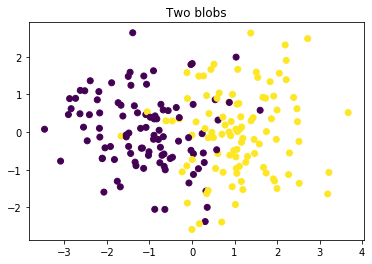

In [91]:
stds=[0.05, 0.25, 0.50, 0.75]

for std in stds

X, y = make_blobs(n_samples=200, centers=[[-1,0],[1,0]], n_features=2,cluster_std=std**2)
#plt.scatter(X[:,0],X[:,1], c=y)
#plt.title("Two blobs")

In [0]:
def add_bias(X):
  newX=[]
  for x in X:
    newX.append(np.array([x[0],x[1],1]))
  newX=np.array(newX)
  return newX

In [0]:
X=add_bias(X)

def prediction(X,w):
  if np.vdot(X,w)>0:
    return 1
  else : 
    return 0 

def perceptron(X,y,nb_steps):
  w=np.zeros(len(X[0]))
  for k in range(nb_steps):
    for i in range(len(X)):
      if prediction(X[i],w)!=y[i]:
        if prediction(X[i],w)==1:
          w=w-X[i]
        else:
          w=w+X[i]
  
  return w

In [0]:
w=perceptron(X,y,200)

15.812739489476359


Text(0.5, 1.0, 'Two blobs')

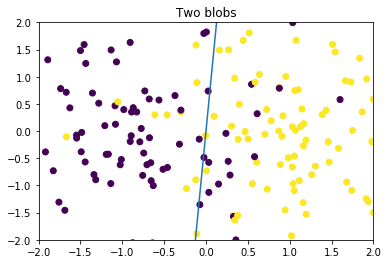

In [95]:
x_boundary=np.arange(-2,12,0.01)
y_boudary=(float(-w[0])/w[1])*x_boundary-w[2]/w[1]

print((float(-w[0])/w[1]))

plt.plot(x_boundary,y_boudary)
plt.xlim((-2,2))
plt.ylim((-2,2))
plt.scatter(X[:,0],X[:,1], c=y)
plt.title("Two blobs")

In [96]:
def erreur_empirique(X,y,w):
  n=len(X)
  s=0
  for i in range(n):
    if prediction(X[i],w)!=y[i]:
      s+=1
  return s/n

erreur_empirique(X,y,w)

0.13

In [105]:
stds=[0.05, 0.25, 0.50, 0.75]
erreurs=[]

for std in stds:
  erreur=[]
  for k in range(50):
    X, y = make_blobs(n_samples=200, centers=[[-1,0],[1,0]], n_features=2,cluster_std=std)
    w=perceptron(X,y,200)
    erreur.append(erreur_empirique(X,y,w))
  erreur=np.array(erreur)
  erreurs.append([erreur.mean(),erreur.std()])

print(erreurs)

[[0.0, 0.0], [0.0, 0.0], [0.0255, 0.025104780421266383], [0.11180000000000001, 0.05493414238886414]]


In [0]:
import random as rd

In [110]:
std=0.15
X, y = make_blobs(n_samples=200, centers=[[-1,0],[1,0]], n_features=2,cluster_std=std)

p=[0,0.05,0.10,0.2]
n=200

erreurs=[]

for p in p:
  erreur=[]
  for k in range(50):
    X, y = make_blobs(n_samples=200, centers=[[-1,0],[1,0]], n_features=2,cluster_std=std)
    for i in range(n):
      a=rd.random()
      if a<p:
        y[i]=1-y[i]
    w=perceptron(X,y,200)
    erreur.append(erreur_empirique(X,y,w))
  erreur=np.array(erreur)
  erreurs.append([erreur.mean(),erreur.std()])

print(erreurs)
  




[[0.0, 0.0], [0.0799, 0.13510547731309785], [0.1741, 0.20800646624564342], [0.3554, 0.25567135154334364]]
